# Result for calls clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from util.bat import *
import random
import os
import pandas as pd

# Set some Pandas options
pd.set_option('notebook_repr_html', True)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

ModuleNotFoundError: No module named 'guano'

In [2]:
info=extract_anabat('../data/P7132033.37#')
t=info[0]
freq=info[1]
ampl=info[2]
metadata=info[3]
pulses=remove_noise2(t,freq)

In [3]:
type(pulses)
len(pulses)

22

In [4]:
b,c=get_dy_dy2(pulses)

In [5]:
bf=get_features(b)
cf=get_features(c)

In [6]:
bf.iloc[8:11,]
cf.iloc[8:11,]
ff=pd.concat([bf, cf.iloc[:,0:2]], axis=1)
ff.iloc[8:11,]

,mean,std,min,25%,50%,75%,max,mean,std
0,-214.905634,337.745797,-1269.572577,-318.445984,-129.870130,0.0,262.725780,21.159543,335.974906
0,-244.200244,403.029870,-1836.969001,-302.037785,-204.157749,0.0,505.002683,24.823515,346.400617
0,-158.413035,332.019385,-1587.301587,-298.359927,-131.362890,0.0,987.776269,11.897433,411.448552


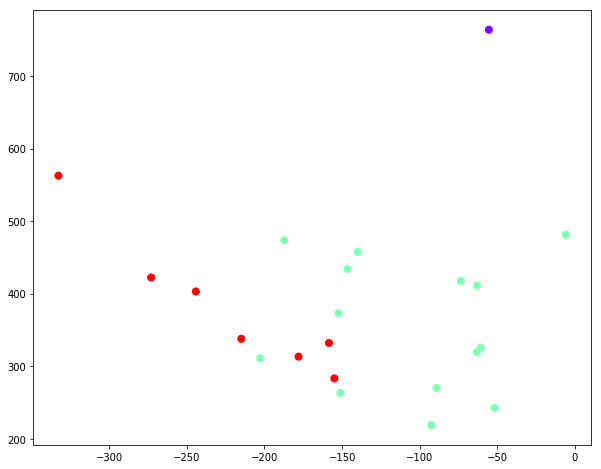

In [7]:
# Clustering a sample recording pulses using KMeans
from sklearn.cluster import KMeans
est = KMeans(3)  # 4 clusters
# X=b.iloc[:,0:2]
X=ff
est.fit(X)
y_kmeans = est.predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='rainbow');

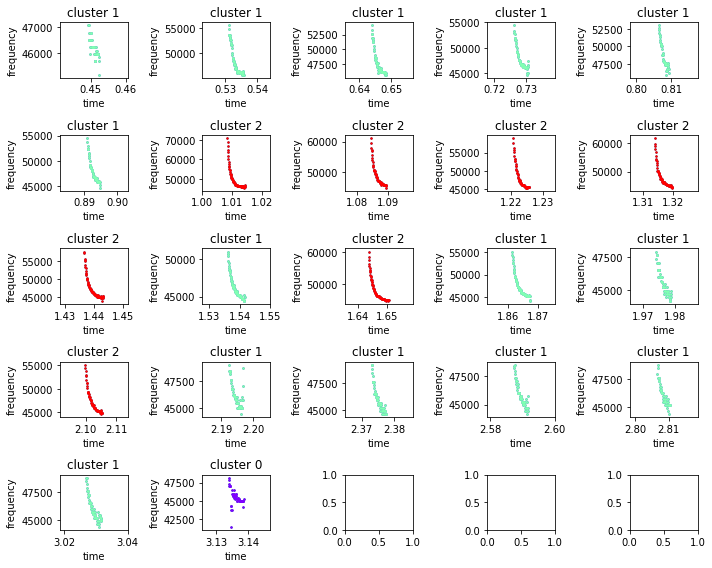

In [8]:
display_pulses(pulses,len(pulses),5,rand_flag=False, cluster=y_kmeans)

### another example for social labeled data ('../data/social/S7152113.44#')

In [9]:
#S7152113.44#

info=extract_anabat('../data/social/S7152113.44#') 
t44=info[0]
freq44=info[1]
ampl44=info[2]
metadata44=info[3]
pulses44=remove_noise2(t44,freq44,avg_d = 3200,pulse_size = 25,pulse_dy_avg=400)
len(pulses44)

42

In [10]:
b44,c44=get_dy_dy2(pulses44)
bf44=get_features(b44)
cf44=get_features(c44)
ff44=pd.concat([bf44.iloc[:,3:6], cf44.iloc[:,3:6]], axis=1)
ff44.iloc[8:11,]

,25%,50%,75%,25%,50%,75%
0,-266.535639,-192.709548,0.0,-99.502488,1.941228,103.610674
0,-399.605805,-188.523624,0.0,-167.599031,1.857243,171.873928
0,-175.318130,-40.764747,0.0,-163.058987,0.000000,84.555870


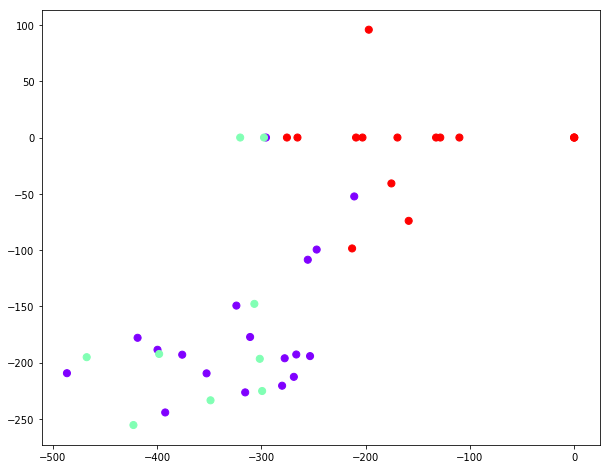

In [11]:
# Clustering a sample recording pulses using KMeans
from sklearn.cluster import KMeans
est = KMeans(3)  # 4 clusters
# X=b.iloc[:,0:2]
X=ff44
est.fit(X)
y_kmeans = est.predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='rainbow');

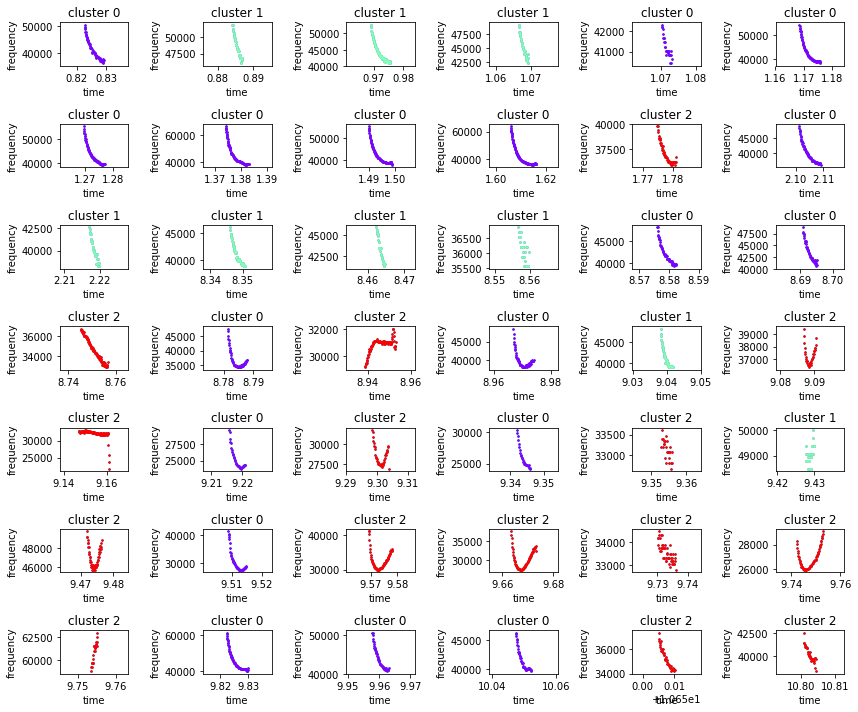

In [12]:
display_pulses(pulses44,len(pulses44),7,figsize=(12,10),rand_flag=False, cluster=y_kmeans)